<a href="https://colab.research.google.com/github/vmcarranzam/pfsl1/blob/main/Proyecto_Final_Statistical_Learning_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final - Statistical Learning I


##Descripcion del proyecto

El objetivo de este proyecto es crear un modelo de clasificación que pueda ser utilizado para para predecir la viabilidad de individuos como donadores de sangre.

Uno de los principales riesgos realizar transfusiones de sangre entre individuos, es la posibilidad de que el donador tenga Hepatitis C, transmitiéndola al receptor en el proceso.





##Sobre el Dataset

Se toma como base el dataset "Hepatitis C Prediction", el cual contiene valores de pruebas de laboratorio realizadas a donadores de sangre y pacientes con Hepatitis C. Los datos fueron obtenidos en https://www.kaggle.com/datasets/wearefuture01/hepatitis-c-prediction , que a su vez fueron recopilados del repositorio de UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data

Contenido:

Todos los atributos, excepto Category y Sex son numéricos.

Los atributos del 1 al 4 se refieren a datos del paciente:
1. X (Patient ID/No.)
2. Category (diagnóstico) (valores: '0=Blood Donor' (apto para donar), '0s=suspect Blood Donor' (apto para donar con sospecha), '1=Hepatitis' (paciente con Hepatitis C), '2=Fibrosis' (paciente con Fibrosis), '3=Cirrhosis' (paciente con Cirrosis))
3. Age (Edad en años)
4. Sex (f,m)

Los atributos del 5 al 14 se refieren a datos de laboratorio:

5. ALB
6. ALP
7. ALT
8. AST
9. BIL
10. CHE
11. CHOL
12. CREA
13. GGT
14. PROT

El atributo objetivo para la clasificación es Category

##Preparación de librerías a utilizar

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

##Exploración del Dataset

Carga del archivo .csv con los datos a un Dataframe de Pandas


In [95]:
df = pd.read_csv("HepatitisCdata.csv")
df.sample(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
94,95,0=Blood Donor,40,m,41.4,67.5,59.8,36.8,7.3,4.18,6.02,76.0,92.7,72.5
127,128,0=Blood Donor,43,m,41.2,59.4,34.3,24.2,4.1,9.64,4.93,84.0,20.8,74.5
38,39,0=Blood Donor,35,m,47.3,92.2,30.7,25.7,6.6,11.58,5.90,82.0,36.9,77.8
590,591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
65,66,0=Blood Donor,37,m,42.9,61.8,96.1,44.1,9.6,7.82,5.10,82.0,32.3,69.3
306,307,0=Blood Donor,66,m,41.0,61.4,28.7,34.8,5.4,9.36,6.66,100.0,26.8,73.6
261,262,0=Blood Donor,57,m,43.3,86.8,21.2,22.2,6.8,7.87,4.91,65.0,19.2,71.3
86,87,0=Blood Donor,39,m,36.0,36.5,21.5,25.7,3.3,8.43,4.85,93.0,23.1,70.5
544,545,1=Hepatitis,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5
71,72,0=Blood Donor,38,m,39.9,62.9,71.7,43.9,10.4,10.90,7.01,99.0,88.3,73.1


Se obtiene el conteo de cada ocurrencia distina en las columnas Category y Sex

In [96]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [97]:
df['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

Se observa que, de los 615 pacientes cuyos datos se tienen, el 86.67% son buenos candidatos a donadores.

También cabe resaltar que más del 60% de los pacientes cuyos datos se tienen, son de sexo masculino.

##Pre-procesamiento de datos

Se procede a convertir las variables categóricas en numéricas, para facilitar su procesamiento, estas son Category y Sex, esto consiste en asignar valores numéricos a cada ocurrencia distinta presente en la columna, realizando las siguientes equivalencias:

Para la variable Category:
* 0=Blood Donor             0
* 0s=suspect Blood Donor    1
* 1=Hepatitis               2
* 2=Fibrosis                3
* 3=Cirrhosis               4

Para la variable Sex:
* m    1
* f    0

El resultado son dos nuevas columnas con los valores numéricos correspondientes, por lo que se procede a retirar las columnas categóricas originales del Dataframe.

In [98]:
df['Category'] = pd.Categorical(df['Category'])
df['Sex'] = pd.Categorical(df['Sex'])
df['SexNum'] = df['Sex'].cat.codes
df['CatNum'] = df['Category'].cat.codes
columns_to_drop = ['Category', 'Sex', 'Unnamed: 0']
df.drop(columns_to_drop, axis=1, inplace=True)
df.tail(20)


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,SexNum,CatNum
595,56,27.0,81.1,17.0,319.8,37.0,1.42,3.54,66.9,93.7,65.3,1,4
596,56,23.0,105.6,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8,1,4
597,56,30.0,40.4,0.9,80.3,119.0,1.88,1.43,79.3,17.6,54.2,1,4
598,58,31.0,143.1,7.0,181.8,58.0,3.29,3.92,66.4,273.7,78.1,1,4
599,59,36.0,49.7,5.2,110.1,37.0,2.29,3.68,118.2,56.9,74.8,1,4
600,59,27.0,73.8,4.0,65.2,209.0,2.47,3.61,71.7,28.5,60.6,1,4
601,59,31.0,86.3,5.4,95.4,117.0,1.57,3.51,60.5,53.6,68.5,1,4
602,61,39.0,102.9,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4,1,4
603,65,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0,1,4
604,74,23.0,34.1,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1,1,4


Para obtener más información de los valores del Dataset resultante, se utiliza la función describe()

In [82]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,SexNum,CatNum
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153,0.616299,0.303905
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883,0.486700,0.944552
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.000000,0.000000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000,0.000000,0.000000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000,1.000000,0.000000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000,1.000000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000,1.000000,4.000000


Se eliminan filas del Dataframe que contengan valores no numéricos para evitar que influyan en la creación del modelo.

In [99]:
df.dropna(inplace=True)

Se estandarizan los datos numéricos con el fin de facilitar su procesamiento.

In [100]:
dfnorm = df
numerical_columns = dfnorm.select_dtypes(include=['float64', 'int64']).columns
dfnorm[numerical_columns] = StandardScaler().fit_transform(dfnorm[numerical_columns])
dfnorm.sample(20)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,SexNum,CatNum
22,-1.352191,0.186858,-0.109004,0.965422,-0.105754,0.711936,1.254500,-0.293743,-0.131660,1.131694,-0.522076,1,0
114,-0.545975,0.916417,0.022275,4.390638,0.472828,0.527941,-0.124992,0.202712,0.085500,0.676447,0.357359,1,0
209,0.361018,0.169487,0.037720,-0.430569,-0.166657,-0.190789,3.287195,-0.284878,-0.013209,-0.152949,1.105814,1,0
479,0.562572,-0.629554,0.640058,-0.147533,-0.425496,-0.012544,-0.412766,-0.506510,-0.388303,-0.493924,-0.634344,0,0
216,0.461795,7.048188,0.543530,0.500092,-0.306734,-0.185039,0.318090,0.619381,-0.092176,0.914208,-0.840170,1,0
556,0.260241,0.065265,-1.024095,-0.785563,0.131769,0.343946,0.610433,1.461583,-0.125738,0.993461,0.076688,1,2
317,2.981220,1.837051,-0.614813,-0.699213,-0.312825,-0.006794,-1.230412,-0.869987,0.421110,-0.228517,-0.877592,1,0
476,0.562572,0.360562,0.624614,-0.373002,-0.462038,-0.144791,0.921047,1.115837,-0.506754,-0.399925,0.937412,0,0
267,1.167234,0.707971,1.825430,-0.488136,-0.303689,-0.420783,-0.001660,-0.825661,-0.230369,-0.440474,1.236794,1,0
79,-0.949083,-0.195292,-0.248005,-0.382597,-0.276283,-0.248288,0.121672,0.583920,0.144725,-0.342789,0.694164,1,0


Se visualiza la correlación entre el atributo objetivo y los descriptores del Dataframe.

<Axes: >

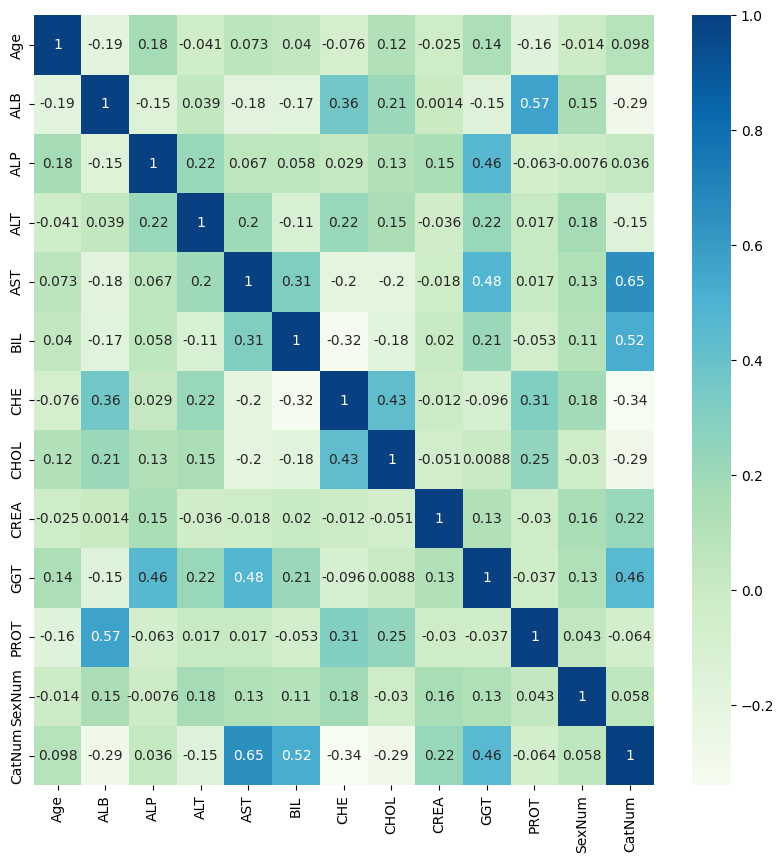

In [101]:
plt.figure(figsize = (10,10))
sns.heatmap(dfnorm.corr(), annot= True, cmap = 'GnBu')

Para poder procesar los datos, es necesario convertir el Dataframe en un arreglo de numpy.

In [102]:
dfnorm.columns

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT', 'SexNum', 'CatNum'],
      dtype='object')

##Asignación de descriptores y objetivo para el modelo a utilizar

In [104]:
X = dfnorm[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT','PROT', 'SexNum']].values
X[0:5]

array([[-1.55374517, -0.54270146, -0.60323005, -0.90549379, -0.35545693,
        -0.20228893, -0.58177708, -1.91609052,  0.48033581, -0.48102205,
        -0.54078756,  1.        ],
       [-1.55374517, -0.54270146,  0.08405364, -0.41138002, -0.27628268,
        -0.40928316,  1.35499299, -0.52424085, -0.15140186, -0.4165134 ,
         0.86256616,  1.        ],
       [-1.55374517,  0.91641697,  0.25394399,  0.46171419,  0.57331796,
        -0.28278669,  0.29068302, -0.16962947,  0.08549977, -0.09212705,
         1.38648489,  1.        ],
       [-1.55374517,  0.27371004, -0.62253577,  0.19306982, -0.34023111,
         0.45319281, -0.39906292, -0.57743256, -0.03295105, -0.08106842,
         0.7128751 ,  1.        ],
       [-1.55374517, -0.42110826,  0.23077712,  0.28901424, -0.27323751,
        -0.0815423 ,  0.43228649, -0.94977451, -0.11191825, -0.15294949,
        -0.59692171,  1.        ]])

In [105]:
y = dfnorm['CatNum'].values
y[0:600]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Tomando en consideración la cantidad de datos del Dataset, se toma la decisión de utilizar el 60% de los mismos como datos de entrenamiento y el 40% restante como datos de validación.

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)

##Modelo a utilizar

Se decide utilizar el modelo K-Nearest Neighbors, puesto que es efectivo para tareas de clasificación con valores continuos.

Debido al conocimiento que se tiene sobre el Dataset, se sabe que son 5 categorías en las que deben clasificarse los datos, por lo que se elige k=5

In [106]:
k = 5
knnmod = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knnmod

KNeighborsClassifier()

Una vez entrenado el modelo, se procede a realizar predicciones y a obtener puntajes de validación.

In [107]:
yhat = knnmod.predict(X_test)
yhat[0:236]

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0], dtype=int8)

In [108]:
print("Certeza en entrenamiento: ", metrics.accuracy_score(y_train, knnmod.predict(X_train)))
print("Certeza en validación: ", metrics.accuracy_score(y_test, yhat))

Certeza en entrenamiento:  0.9376770538243626
Certeza en validación:  0.9152542372881356


##Pruebas adicionales

Aún cuando el puntaje de certeza es elevado en el modelo obtenido, con el fin de mejorarlo, se propone entrenar otro modelo, con la diferencia de que este solo utilizará solamente los predictores con mayor índice de correlación con la variable objetivo, ALT, AST y GGT.

In [120]:
Xalt = dfnorm[['ALT', 'AST',  'GGT']].values
Xalt_train, Xalt_test, y_train, y_test = train_test_split( Xalt, y, test_size=0.4, random_state=4)

In [121]:
knnmodalt = KNeighborsClassifier(n_neighbors = k).fit(Xalt_train,y_train)
knnmodalt

KNeighborsClassifier()

In [122]:
yhatalt = knnmodalt.predict(Xalt_test)

In [123]:
print("Certeza en entrenamiento: ", metrics.accuracy_score(y_train, knnmodalt.predict(Xalt_train)))
print("Certeza en validación: ", metrics.accuracy_score(y_test, yhatalt))

Certeza en entrenamiento:  0.943342776203966
Certeza en validación:  0.923728813559322


##Conclusiones



*   El modelo KNN fue efectivo para realizar la clasificación deseada
*   La selección del valor k para el modelo se vio simplificada por el conocimiento previo sobre el Dataset

*   La certeza del modelo se benefició de la reducción estratégica de predictores.

